# **Analiza zmian klimatycznych metodami uczenia maszynowego**

Import bibliotek:

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Emisja CO2**


Pierwszym etapem niniejszej pracy jest przedstawienie danych w formie czytelnych wykresów odnośnie emisji CO2 w latach 1960 - 2019 dla całego świata i pojedyńczych państw, a także próba predykcji tych wartości dla lat późniejszych. Zostaną użyte i porównane różne algorytmy uczenia maszynowego takie jak:
- regresja liniowa
- regresja wielomianowa


a także metody statystyczne takie jak:
- model ARIMA

Wczytanie danych:

In [45]:
data = pd.read_csv('co2_emissions_kt_by_country.csv')
print(data)

      country_code country_name  year    value
0              ABW        Aruba  1960 11092.67
1              ABW        Aruba  1961 11576.72
2              ABW        Aruba  1962 12713.49
3              ABW        Aruba  1963 12178.11
4              ABW        Aruba  1964 11840.74
...            ...          ...   ...      ...
13948          ZWE     Zimbabwe  2015 12430.00
13949          ZWE     Zimbabwe  2016 11020.00
13950          ZWE     Zimbabwe  2017 10340.00
13951          ZWE     Zimbabwe  2018 12380.00
13952          ZWE     Zimbabwe  2019 11760.00

[13953 rows x 4 columns]


Dane w tabeli reprezentują ilość CO2 wypuszczoną w danym roku dla różnych krajów. Kolumna "value" zawiera ilość CO2 wyrażoną w kilotonach (kt czyli tysiące ton) dla danego kraju w danym roku.

Łączna emisja CO2 wg. roku i kraju:

In [46]:
world_data = data[data['country_name'] == 'World']
usa_data = data[data['country_name'] == 'United States']
european_data = data[data['country_name'] == 'European Union']
china_data = data[data['country_name'] == 'China']
india_data = data[data['country_name'] == 'India']
russia_data = data[data['country_name'] == 'Russian Federation']
poland_data = data[data['country_name'] == 'Poland']

world_co2_by_year = world_data.groupby('year')['value'].sum()
usa_co2_by_year = usa_data.groupby('year')['value'].sum()
european_co2_by_year = european_data.groupby('year')['value'].sum()
china_co2_by_year = china_data.groupby('year')['value'].sum()
india_co2_by_year = india_data.groupby('year')['value'].sum()
russia_co2_by_year = russia_data.groupby('year')['value'].sum()
poland_co2_by_year = poland_data.groupby('year')['value'].sum()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

total_co2_by_year = world_co2_by_year

print(total_co2_by_year)

year
1960    9463838.50
1961    9423934.42
1962    9732505.89
1963   10274503.99
1964   10820253.01
1965   11402575.20
1966   11988321.42
1967   12413351.89
1968   13087346.57
1969   13976005.56
1970   15272289.24
1971   15913710.78
1972   16680140.79
1973   17582029.20
1974   17563629.93
1975   17641960.09
1976   18580873.04
1977   19183226.42
1978   19921141.71
1979   20459807.60
1980   20396427.12
1981   19879068.57
1982   19815965.25
1983   20034812.12
1984   20636636.76
1985   21429383.16
1986   21729229.48
1987   22365639.63
1988   23289432.35
1989   23699896.02
1990   20625272.97
1991   20766900.89
1992   20796958.43
1993   20937123.28
1994   21052949.10
1995   21652838.85
1996   22110607.51
1997   22492054.36
1998   22613709.04
1999   22720117.59
2000   23445433.27
2001   23845771.45
2002   24165261.26
2003   25285349.24
2004   26434355.26
2005   27414328.02
2006   28302931.66
2007   29368779.20
2008   29595752.40
2009   29267375.19
2010   31043476.98
2011   32021108.26
2012   

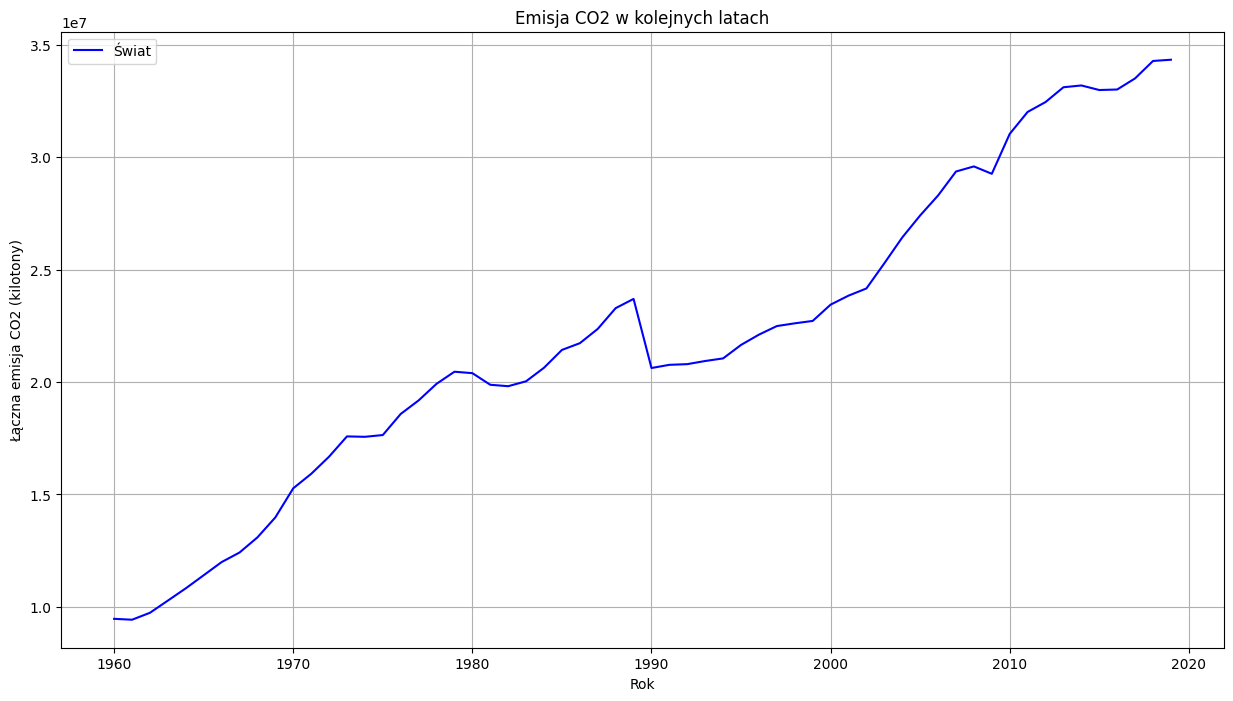

In [47]:
plt.figure(figsize=(15, 8))
plt.plot(total_co2_by_year.index, total_co2_by_year.values, label='Świat', color='blue')


plt.title('Emisja CO2 w kolejnych latach')
plt.xlabel('Rok')
plt.ylabel('Łączna emisja CO2 (kilotony)')
plt.legend()
plt.grid(True)
plt.show()

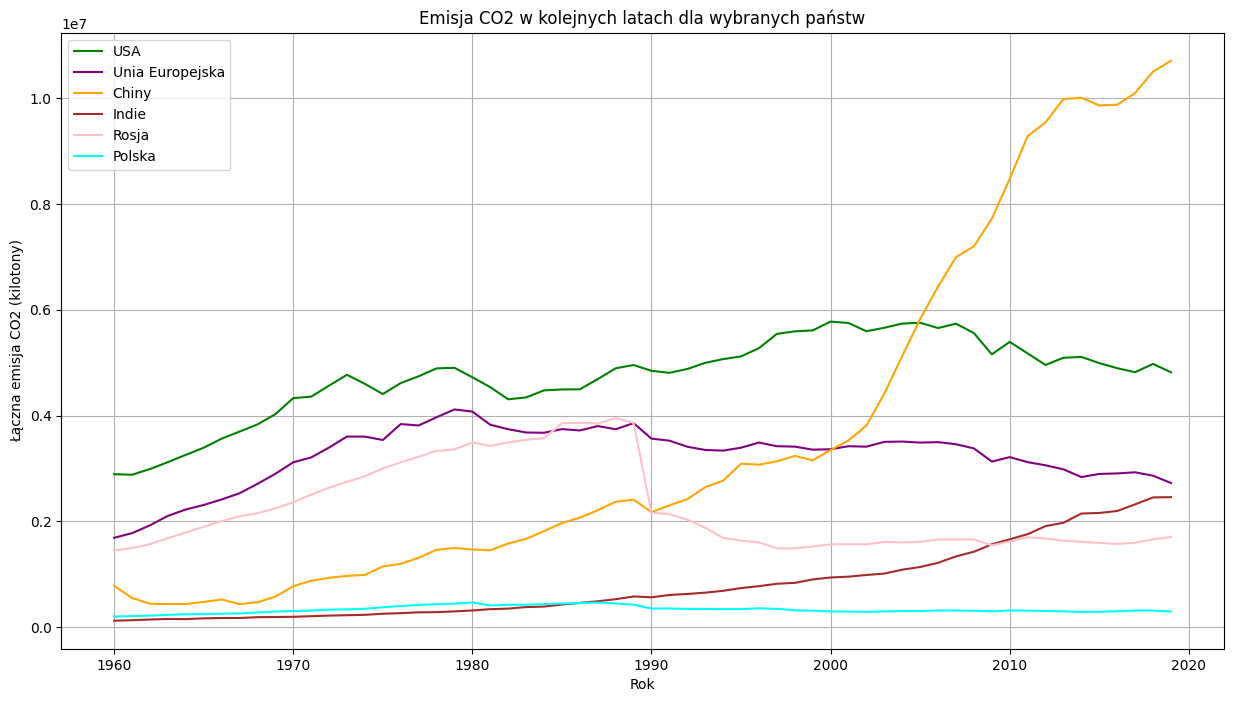

In [48]:
plt.figure(figsize=(15, 8))

plt.plot(usa_co2_by_year.index, usa_co2_by_year.values, label='USA', color='green')
plt.plot(european_co2_by_year.index, european_co2_by_year.values, label='Unia Europejska', color='purple')
plt.plot(china_co2_by_year.index, china_co2_by_year.values, label='Chiny', color='orange')
plt.plot(india_co2_by_year.index, india_co2_by_year.values, label='Indie', color='brown')
plt.plot(russia_co2_by_year.index, russia_co2_by_year.values, label='Rosja', color='pink')
plt.plot(poland_co2_by_year.index, poland_co2_by_year.values, label='Polska', color='cyan')

plt.title('Emisja CO2 w kolejnych latach dla wybranych państw')
plt.xlabel('Rok')
plt.ylabel('Łączna emisja CO2 (kilotony)')
plt.legend()
plt.grid(True)
plt.show()

Próba predykcji emisji CO2 dla całego świata metodą **regresji liniowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


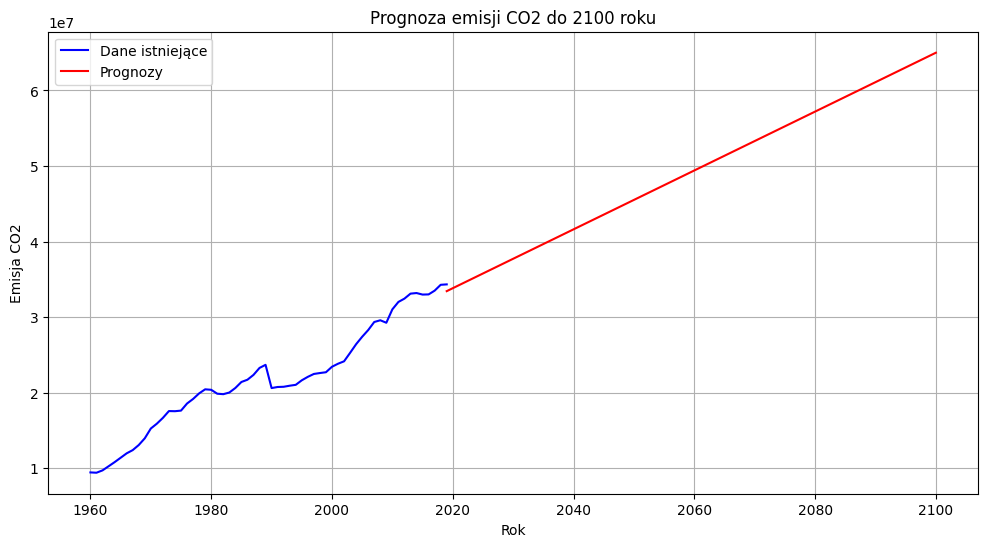

In [49]:

X = world_data[['year']]
y = world_data['value']

model = LinearRegression()
model.fit(X, y)

future_years = [[year] for year in range(2019, 2101)]
future_predictions = model.predict(future_years)

plt.figure(figsize=(12, 6))

plt.plot(world_data['year'], world_data['value'], color='blue', label='Dane istniejące')

plt.plot(range(2019, 2101), future_predictions, color='red', label='Prognozy')

plt.title('Prognoza emisji CO2 do 2100 roku')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.legend()
plt.grid(True)
plt.show()

Należy oczywiście wziąść pod uwagę, że regresja liniowa jest prostym modelem, który zakłada liniową zależność między zmiennymi. Jednak emisje CO2 mogą podlegać wpływowi wielu skomplikowanych czynników, takich jak technologiczny postęp, polityka rządowa i zmieniające się wzorce konsumpcji. Rządy prawdopodobnie będą kontynuować wysiłki w kierunku ograniczenia emisji CO2, co może wpłynąć na przyszłe trendy. Dlatego aby tego typu prognozy były jak najbardziej rzetelne powinno się monitorować i brać pod uwagę inne czynniki, by prognozy te były jak najbardziej rzetelne.

Próba predykcji emisji CO2 dla całego świata metodą **regresji wielomianowej**

R-squared dla trenowanych danych: 0.972436161634668


C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


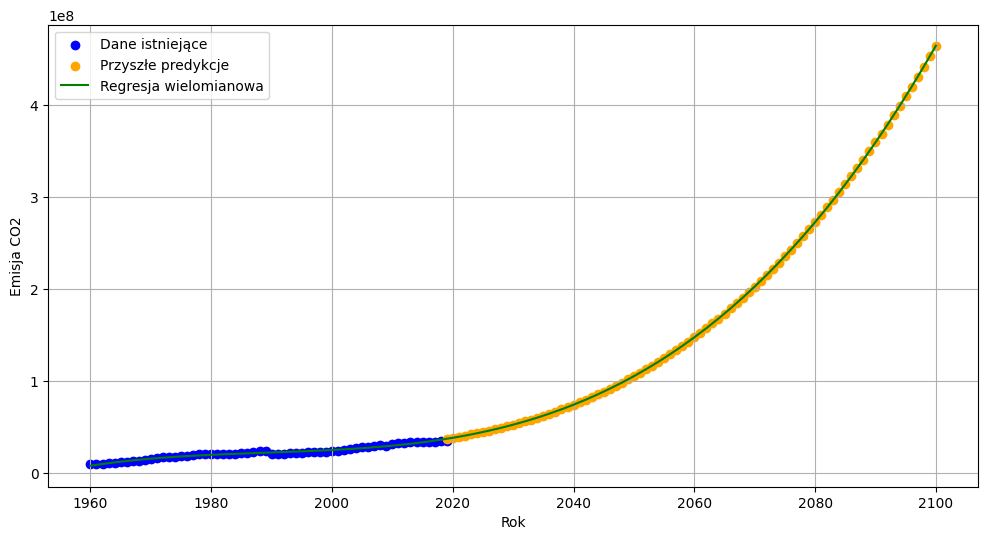

In [50]:

X = world_data[['year']]
y = world_data['value'].values

degree = 3

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)


r2_train = r2_score(y_train, y_pred_train)
print(f"R-squared dla trenowanych danych: {r2_train}")


future_years = [[year] for year in range(2019, 2101)]
future_years_poly = poly_features.transform(future_years)
future_emission = model.predict(future_years_poly)


X_range = np.concatenate((X, future_years), axis=0)
X_range_poly = poly_features.transform(X_range)

plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='blue', label='Dane istniejące')
plt.scatter(future_years, future_emission, color='orange', label='Przyszłe predykcje')  
plt.plot(X_range, model.predict(X_range_poly), color='green', label='Regresja wielomianowa')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.grid(True)
plt.legend()
plt.show()

Dane z regresji liniowej przewidują bardziej optymystyczny scenariusz w którym to do roku 2100 przewidywana emisja będzie cały rząd wielkości mniejsza, niż za pomocą regresji wielomianowej. Różnice między przewidywaniami regresji liniowej, a wielomianowej mogą wynikać z ograniczeń liniowego modelu, który zakłada stałą, jednostajną zmianę na przestrzeni lat. W przypadku zjawisk złożonych, takich jak emisja CO2, regresja wielomianowa jest bardziej elastyczna i może lepiej odzwierciedlać nieliniowe wzorce, co czasami prowadzi do bardziej realistycznych prognoz. Jednak i tak należy wziąść pod uwagę, iż modele te operują tylko na dostarczonych danych liczbowych, nie są więc w stanie wziąść pod uwagę wysiłku rządów w celu ograniczania tejże emisji.

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

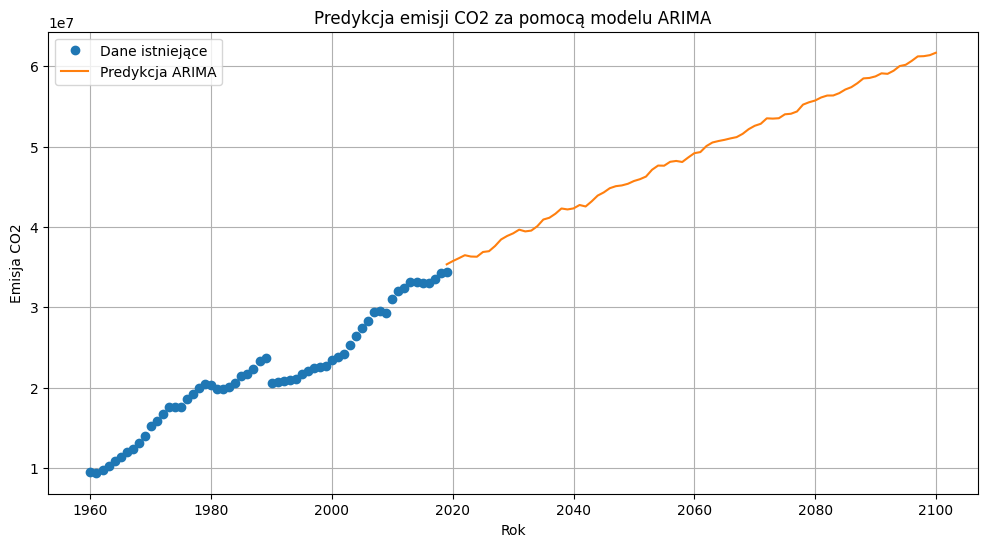

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Przygotowanie danych
X = world_data[['year']]
y = world_data['value']

# Dopasowanie modelu ARIMA
model = ARIMA(y, order=(20,1,20))  # Przykładowe parametry (p, d, q)
model_fit = model.fit()

# Predykcja dla przyszłych lat
future_years = np.arange(2019, 2101)
future_emission = model_fit.forecast(steps=len(future_years))

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'o', label='Dane istniejące')
plt.plot(future_years, future_emission, '-', label='Predykcja ARIMA')
plt.title('Predykcja emisji CO2 za pomocą modelu ARIMA')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.legend()
plt.grid(True)
plt.show()


